In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
nb_acc = accuracy_score(y_test, y_pred_nb)

In [7]:

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        75
           1       0.94      0.96      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        75
           1       0.96      0.88      0.92        75

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



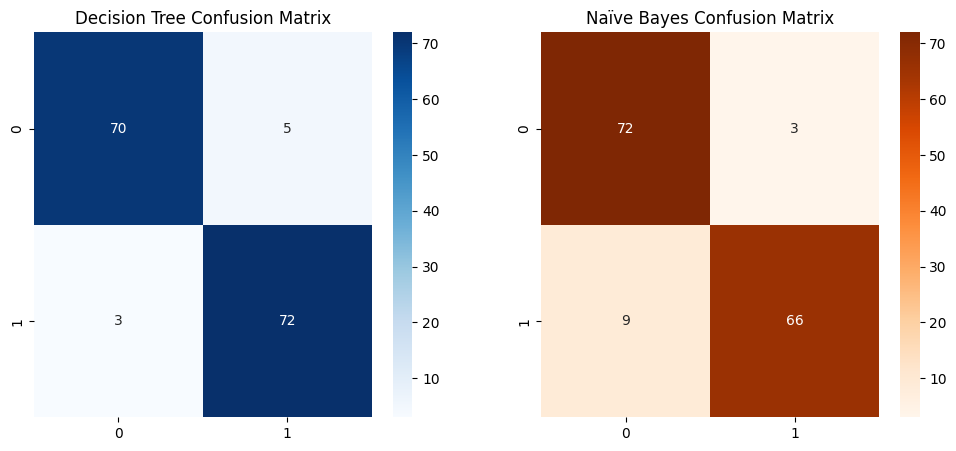

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")
plt.show()


C:\Users\sudarshan\AppData\Local\Temp\ipykernel_14844\1482558654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance, palette='viridis')


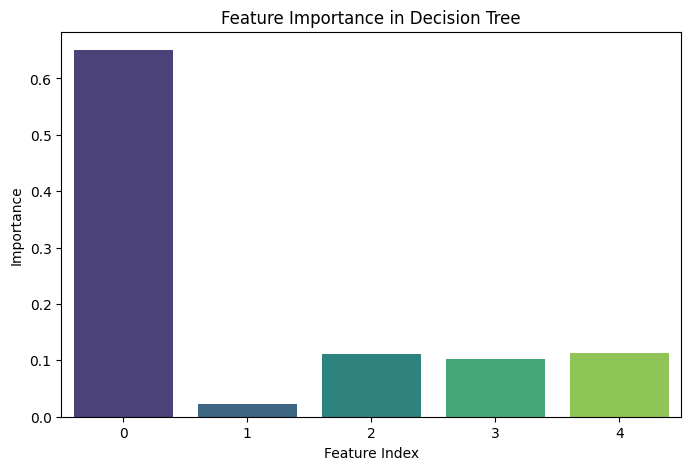

In [9]:
feature_importance = dt_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance, palette='viridis')
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()


C:\Users\sudarshan\AppData\Local\Temp\ipykernel_14844\387334108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='coolwarm')


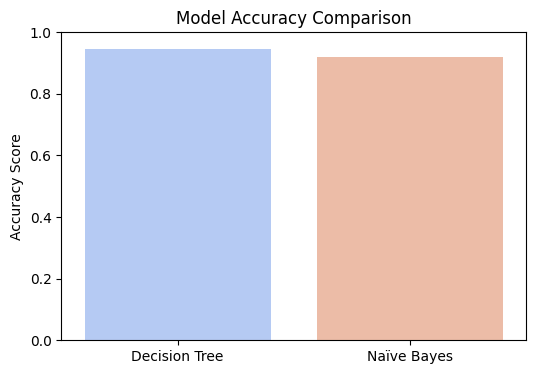

In [10]:
models = ["Decision Tree", "Naïve Bayes"]
accuracy_scores = [dt_acc, nb_acc]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracy_scores, palette='coolwarm')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()